<a href="https://colab.research.google.com/github/andrew-shackelford/Harvard_Twitter_Research_2018/blob/hailey_midterm_prediction_results/midterm_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Midterm Prediction Analysis**

Questions to answer:

-What was our overall accuracy?

-What was our accuracy within races that went to democrats? Republicans?

-What kind of overall turn out did we predict (Democrat landslide vs not)? What actually happened?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
prediction_results = pd.read_csv('midterm_predictions_with_results.csv')


In [0]:
# eliminate races we weren't able to predict
prediction_results = prediction_results.loc[prediction_results['winner_predicted_by_total'] != 'not enough info']

In [0]:
# Add boolean columns to indicate if we predicted correctly for each model

new_total_c = prediction_results.apply(lambda row: row['actual_winner'] == row['winner_predicted_by_total'], axis=1)
prediction_results = prediction_results.assign(correct_total=new_total_c.values)

new_unique_c = prediction_results.apply(lambda row: row['actual_winner'] == row['winner_predicted_by_unique'], axis=1)
prediction_results = prediction_results.assign(correct_unique=new_unique_c.values)


###What was our overall accuracy for each model?


In [7]:
correct_total = prediction_results.loc[prediction_results['correct_total']].shape[0]

unique_total = prediction_results.loc[prediction_results['correct_unique']].shape[0]

correct_total_percentage = correct_total / len(prediction_results)

unique_total_percentage = unique_total / len(prediction_results)

print("Accuracy using total tweets: {} \nAccuracy using unique posters: {} \n".format(correct_total_percentage, unique_total_percentage))
 

Accuracy using total tweets: 0.3383458646616541 
Accuracy using unique posters: 0.3483709273182957 



### What was our accuracy for each model separated by which party won?

In [8]:

democrats_won = prediction_results.loc[prediction_results['affiliation'] == 'Democratic Party']
correct_total_democrats = democrats_won.loc[democrats_won['correct_total'] == True].shape[0]

percentage_correct_total_democrats = correct_total_democrats/len(prediction_results)

republicans_won = prediction_results.loc[prediction_results['affiliation'] == 'Republican Party']
correct_total_republicans = republicans_won.loc[republicans_won['correct_total'] == True].shape[0]
percentage_correct_total_republicans = correct_total_republicans/len(prediction_results)

print("Using total:\nAccuracy predicting democratic wins: {}\nAccuracy predicting republican wins: {}".format(percentage_correct_total_democrats,percentage_correct_total_republicans))

Using total:
Accuracy predicting democratic wins: 0.24060150375939848
Accuracy predicting republican wins: 0.09774436090225563


In [9]:
democrats_won = prediction_results.loc[prediction_results['affiliation'] == 'Democratic Party']
correct_unique_democrats = democrats_won.loc[democrats_won['correct_unique'] == True].shape[0]
percentage_correct_unique_democrats = correct_unique_democrats/len(prediction_results)

republicans_won = prediction_results.loc[prediction_results['affiliation'] == 'Republican Party']
correct_unique_republicans = republicans_won.loc[republicans_won['correct_unique'] == True].shape[0]
percentage_correct_unique_republicans = correct_unique_republicans/len(prediction_results)

print("Using total:\nAccuracy predicting democratic wins: {}\nAccuracy predicting republican wins: {}".format(percentage_correct_unique_democrats,percentage_correct_unique_republicans))

Using total:
Accuracy predicting democratic wins: 0.2506265664160401
Accuracy predicting republican wins: 0.09774436090225563


In [0]:
#prediction_results.loc['affiliation'] = prediction_results.loc['affiliation'].map({'democrat': 'Democratic Party', 'republican': 'Republican Party'})

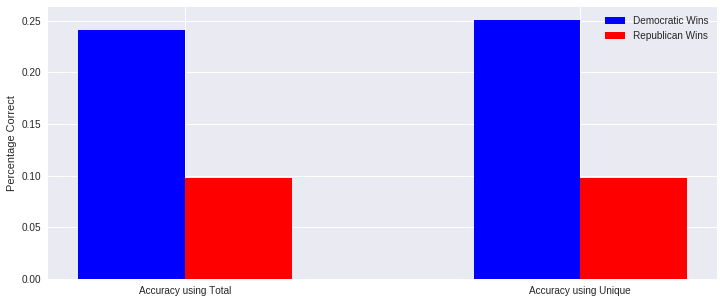

In [33]:
# plot these respectively 

accuracies_by_party = []
labels = ["Accuracy using Total", "Accuracy using Unique"]
ind = np.arange(len(labels))  # the x locations for the bars
width = 0.27       # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
# fig = plt.figure()
# ax = fig.add_subplot(111)

democrat_vals = [percentage_correct_total_democrats,percentage_correct_unique_democrats]
rects1 = ax.bar(ind, democrat_vals, width, color='b')
republican_vals = [percentage_correct_total_republicans,percentage_correct_unique_republicans]
rects2 = ax.bar(ind+width, republican_vals, width, color='r')

ax.set_ylabel('Percentage Correct')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ['Democratic Wins', 'Republican Wins'])
          
plt.show()

###What actually happened vs what did we predict?

<Container object of 2 artists>

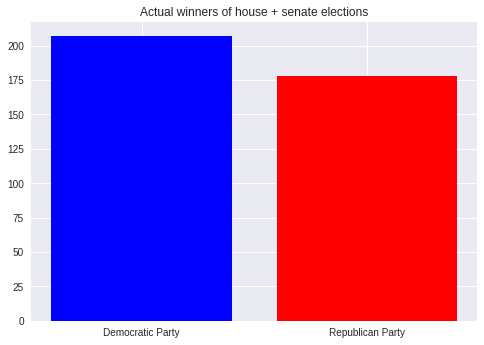

In [14]:
#Data from the actual race

democrats_won = prediction_results.loc[prediction_results['affiliation'] == 'Democratic Party'].shape[0]
republicans_won = prediction_results.loc[prediction_results['affiliation'] == 'Republican Party'].shape[0]
results = [democrats_won,republicans_won]
xs = np.arange(len(results))
labels = ['Democratic Party','Republican Party']
plt.xticks(xs, labels)
plt.title('Actual winners of house + senate elections')
plt.bar(xs, results, align='center', color=['blue', 'red'])